# 13. Linear Regression II

Thank you to Jennifer Nicholas, Chris Frost and Ruth Keogh whose notes on linear regression and generalised linear models were particularly useful in the development of the current lesson.

## 13.1  Intended Learning Outcomes:

By the end of this chapter, you will be able to: 

1. Apply a range of graphical techniques to investigate the assumptions of the linear regression model.
2. Explain how to modify the linear regression model to allow for a non-linear association between an independent variable and an outcome. 
3. Fit and interpret linear regression models that include interaction terms. 
4. Understand how the results of a linear regression may be interpreted differently, depending on the type of research question.


## 13.2 Introduction

In the last lesson, we introduced the linear regression model and learnt how to estimate the model parameters and conduct statistical inference on our estimates. We also briefly discussed the assumptions of a linear regression model, but did not consider the validity of the assumptions in our examples. In this session, we will learn about a variety of diagnostic tools that can be used to test the assumptions we make (Section 3). We then learn how to fit more complex linear models which are useful in situations where the covariate is not linearly associated with the outcome (Section 4). We end the lesson by discussing how the type of research question being asked influences the way we present and interpret the results from a linear regression model (Section 5). 
 
The examples in the current lesson will use the same birthweight data as was used in the examples in the previous lesson. The data can be downloaded using the following code: 

In [1]:
#Load data
data<- read.csv('https://www.inferentialthinking.com/data/baby.csv')

## 13.3 Diagnostics for checking the assumptions of linear regression

As previously discussed, the linear regression model makes certain assumptions and all inferences made from a model are contingent on these assumptions being correct. It is therefore important that we have statistical techniques (or **diagnostic tools**) to investigate these assumptions. 

In practice, it is rare for all the assumptions of a statistical procedure to hold exactly. We may have evidence in the data, or prior knowledge about the data, that lead us to believe that the assumptions made by the model do not hold. This does not necessarily mean that the results from the model should be disregarded, since statistical procedures are **robust** to departures from assumptions in many settings. When conducting statistical analyses, it is a good idea to first try to establish to what extent assumptions hold and then consider whether the methods used can be adapted to improve the extent to which assumptions hold. If adaptations cannot be made, it is necessary to consider to what extent the results of an analysis can be trusted. 

In this section we largely focus on diagnostic tools that can be used to identify assumption violations. Some pointers are given to possible adaptations and alternative techniques that can be used when assumptions are violated, however issues of robustness are not considered in great detail. It is worth noting that, broadly speaking, the central limit theorem implies that departures from assumptions are less important for large datasets than for small ones, and so assumption violations are less of a concern when working with big data. 


### 13.3.1 Assumptions of the linear regression model 

The assumptions made by the linear regression model are as follows:

1. **Linearity:** There is a linear relationship between the dependent variable $Y$ and each of the independent variables. Here we are contrasting a linear relationship with a non-linear relationship, not with no relationship. A model in which one of the regression coefficients is zero can satisfy the assumptions of linear regression. 

2. **Normality:** The true residuals follow a normal distribution. 

3. **Homoscedasticity:** The true residual variance is constant i.e. the scatter of points around the true regression line has the same variance, irrespective of the value of $x_i$. The converse of this feature is termed **heteroscedasticity**. 

4. **Independence:** The observations of $y_i$ are independent. 

In this session we will focus on the first three assumptions. Violations of the independence assumption are often more apparant from the context of a study than from the data itself. For example, if we carry out a study in which the blood pressure of 100 people are each measured twice, and then treat the 200 measurements as independent in the statistical analysis it is clear that the assumption of independence is violated. 

Notice that the normality and homoscedasticity assumptions concern the *true* residuals, defined in terms of deviations from the model defined by population parameters. Since true residuals can never be observed in practice, we have to use the observed residuals (obtained by replacing the population parameters with their estimates). In fact, observed residuals are neither independent nor do they have constant variance, but in most settings the departures from independence and homoscedasticity are very small. Consequently, we can proceed as if the observed residuals were the true residuals when investigating assumptions. 

### 13.3.2 Using plots to investigate assumptions

It is a good idea to explore your data using a number of simple plots. Here we will introduce the most useful plots for both simple and multivariable linear regression models. 

#### 13.3.2.1 Scatter plots of the outcome against independent variables

For simple linear regression models, a scatter plot of the outcome against the independent variable can usually make serious violations of assumptions apparent. Such plots are particularly good for identfiying non-linearity, heteroscedasticity and **outliers** (points which lie atypically far from the regression line). 

Let our outcome and independent variable be denoted by $Y$ and $X$, respectively. The figure below depicts four different scenarios where various assumptions are violated. In Scenario A, there is a slight curvature in the scatter of points between $Y$ and $X$, suggesting a non-linear relationship which violates the linearity assumption. In Scenario B, the variance of $Y$ is larger for larger values of $X$, violating the homoscedasticity assumption. In Scenario C, the linearity and homoscedasticity assumptions appear to hold, but there is a possible outlier (circled in red). Scenario D depicts an ideal situation for simple linear regression, where there appears to be no violations. 

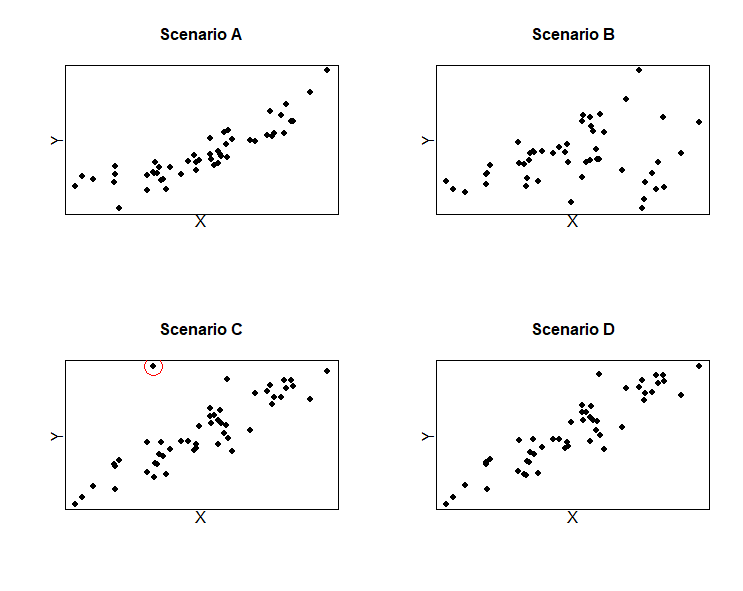

For multivariable linear regression, the linearity assumption requires that the relationship between the outcome and each independent variable is linear *conditional on the other covariates in the model*. So, there is no requirement that the relationship between the outcome and each individual covariate is linear when other covariates are ignored. This means that assessment of the fit of a multivariable linear regression cannot be inferred from a series of scatter plots relating the outcome to each covariate. Such plots can be useful for detecting points with extreme values, but the residual plots considered next are more useful for multivariable models. 

#### 13.3.2.2 Plots of residuals against fitted values or covariates

Plots of the observed residuals against the fitted values are useful for investigating the assumptions of linearity and homoscedasticity. For linearity: if a non-linear relationship is present, then the residuals will not be equally distributed above and below zero across the range of fitted values. For homoscedasticity: if there is heterogeneity in the residuals, the variance of residuals will not be constant across the range of fitted values. 

The figure below uses the same data from Scenarios A-D above, but displays the observed residuals against fitted values. We can see that linearity is violated in Scenario A, since the scatter points are not equally distributed above and below the line at $\epsilon=0$. Furthermore, in Scenario B we can see that the variance of residuals increase with increasing $\hat{y}$, indicating a violation of homoscedasticity. 


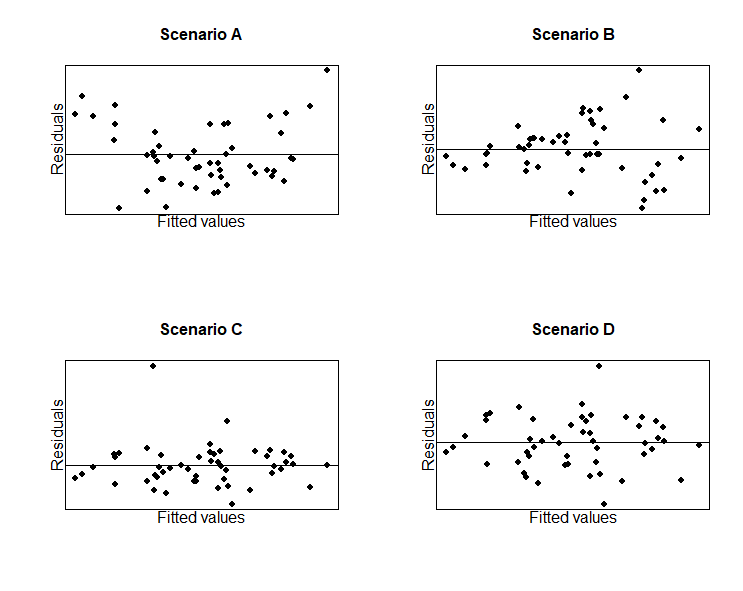

It can also be useful to plot residuals against each covariate, as a futher check for a linear relationship between $Y$ and each of the independent variables (conditional on the other covariates in the model). If there are only a small number of covariates in the model, then these plots can be done for all variables. However, if the model is very complex, it may be judged sufficient to only plot residuals against fitted values and residuals against the most important covariates. 


#### 13.3.2.3 Normal plots of residuals 

Normal plots (such as the **Q-Q plot**) provide the best means of visually detecting departures from normality. The normal Q-Q plot plots observed values against a standard normal distribution with the same number of points. If the data are perfectly normally distributed, the points on a Q-Q plot would lie on the line $Y=X$. Deviations from this line indicate deviations from normality. Q-Q plots of residuals can be used to investigate the normality assumption. 

As previously mentioned, the observed residuals do not have constant variance even when true residuals do. Therefore, some authors suggest using **standardised** residuals in the normal plots (since standardised residuals do have constant variance). On the other hand, some prefer to work with the observed residuals since these have the same units as the outcome. In practice, the differences between the two approaches are minor. 

The figure below depicts normal Q-Q plots for the standardised residuals in Scenarios A-D. In such plots we might expect to see some deviation from the straight line in the extreme values of the residuals and so the variation in the tails are not of great concern. In Scenario A however, there is deviation away from the line $Y=X$ towards the middle, indicating a violation of the normality assumption. Furthermore, the outlier in Scenario C may need further investigation (we discuss outliers further in a subsequent section). 

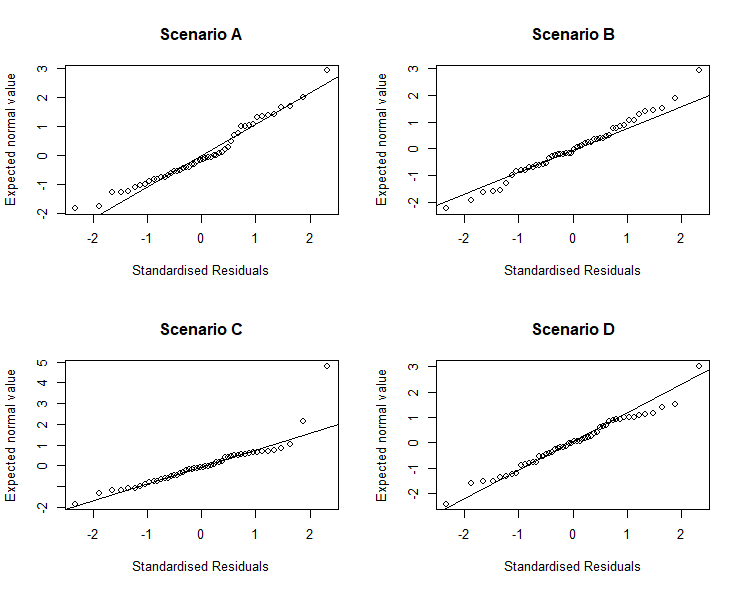

#### 13.3.2.4 Plots based on Cook's distance

Cook's distance is a measure of the **influence** of an observation. An influential observation is one that has a large impact on the model parameter estimates. It is worth checking the influence of observations, particularly potential outliers, to see if they are having a much larger impact on model fit than we would expect. 

For a model with $p$ parameters (with estimated residual variance $\sigma^2$), the Cook's distance for the $i^{th}$ observation ($D_i$) is obtained by refitting the model excluding this observation and obtaining new fitted values ($\hat{y_{j(i)}}$) for all $n$ observations (including the omitted one). $D_i$ is then defined as:

$$D_i = \frac{\sum_{i=1}^n(\hat{y}_{j(i)}-\hat{y}_i)^2}{(p+1)\hat{\sigma}^2}$$

The higher the value of $D_i$, the more influential the observation.

It can be informative to display Cook's distances graphically. The figure below plots the Cook's distances for each observation in Scenarios A-D. 

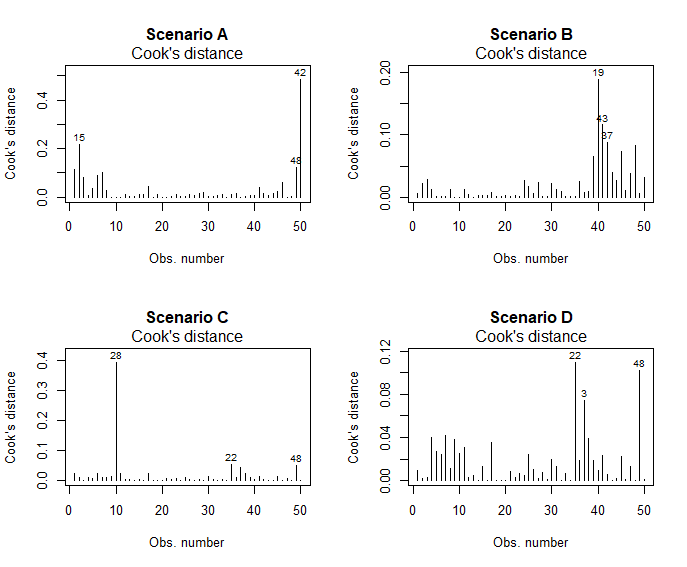

In Scenario C the outlier identified in the previous plots and potentially problematic has a much higher Cook's distance than the other observations, indicating that it is highly influential and worth further investigation. 


### 13.3.3 Statistical tests of assumptions

It might be anticipated that the assumptions of the linear regression model can be investigated using formal hypothesis tests. Indeed there exist a number of statistical tests for normalilty including the Kolmorogorov-Smirnov test and the Shapiro-Wilk test. Further, there exist statistical tests for heteroscedasticity of rediduals. 

However, these tests suffer from the drawback that they tend to only have statistical power to detect model violations when datasets are large and when datasets are large the central limit theorem means that the consequences of these violations of are less important than in small datasets. With large datasets, tests of normality and heteroscedasticity can often be statistically significant, but the impact of these violations may be practically unimportant. For these reasons, the tests are considered by many statisticians to be of limited practical use and so details of these procedures will not be given here.

### 13.3.4 Examples using the birthweight data

We will use some of the graphical tools discussed above to assess the validity of assumptions in the multivariable model defined in the previous chapter (Model 3). Recall Model 3 was defined as: 

$$\text{Model 3: } y_i = \beta_0 + \beta_1 l_i + \beta_2h_i + \epsilon_i $$

The outcome $y_i$ denotes the birthweight (in oz) for the $i^{th}$ baby. The covariates $l_i$ and $h_i$ denote the length of pregnancy (i.e. number of gestational days), and the height of the mother (in inches) for the $i^{th}$ baby, respectively.

The code below fits Model 3 to the birthweight data, and then produces (1) a plot of residuals against fitted values (2) a Q-Q plot of the standardised residuals and (3) a plot of Cook's distances by observation. 

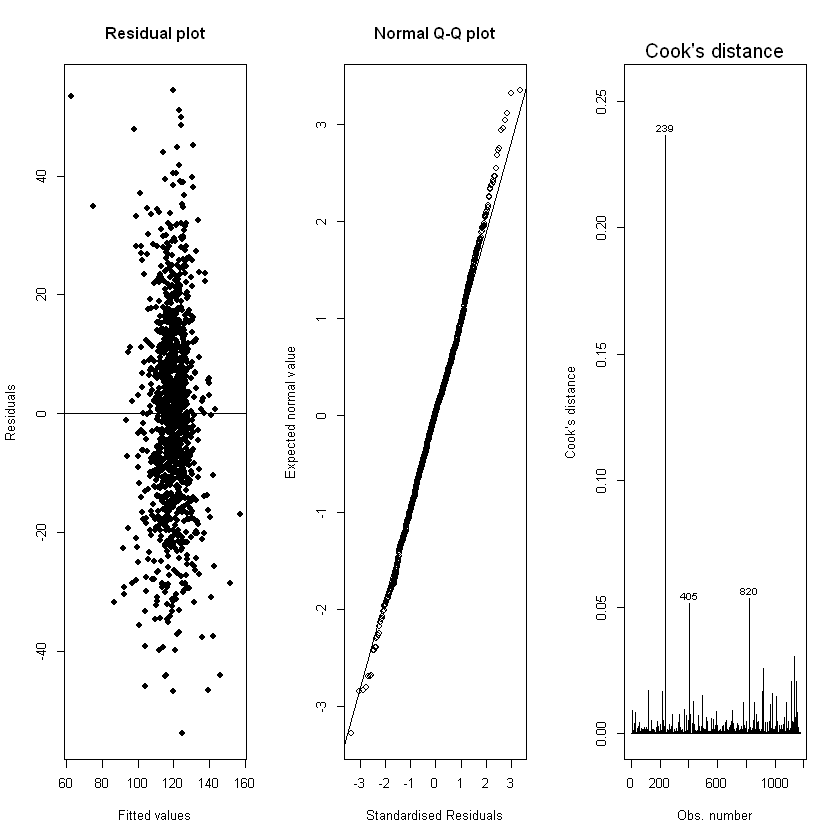

In [2]:
#Load the data
data<- read.csv('https://www.inferentialthinking.com/data/baby.csv')

#Fit Model 3 to the data
model3<-lm(Birth.Weight~Gestational.Days+Maternal.Height, data=data)

#Set the graphical space so that two plots are shown side-by-side in one row
par(mfrow=c(1,3))

#Plot the residuals against the fitted values
plot(model3$fitted.values, model3$residuals, main = "Residual plot", xlab="Fitted values", ylab="Residuals", pch=19)
abline(h=0)

#Obtain the standardised residuals
Standardised.Residuals<-rstandard(model3)

#Normal Q-Q plot of the standardised residuals 
qqnorm(Standardised.Residuals, main="Normal Q-Q plot", ylab="Expected normal value", xlab="Standardised Residuals")
qqline(Standardised.Residuals)

#Plot of Cook's distance
plot(model3, which=4)

We make the following observations: 

1. **Linearity:** The residuals are equally distributed above and below zero in the "Residual plot"

2. **Normality:** There do not appear to be any serious departures from normality, based on the "Normal Q-Q plot" 

3. **Homoscedasticity:** The variance of residuals are constant across the fitted values (based on the "Residual plot")

However, the Cook's distance plot reveals that observation 239 is highly influential, compared to the remaining observations. Observations 405 and 820 also have a relatively high Cook's distance. Sensitivity analyses may be required to assess model fit with and without these observations (this is discussed in Section 3.5.3). 

Finally, we can assume that the independence assumption holds, since the birthweight of a baby from one mother is not expected to be associated with the birthweight of a baby from a different mother. Therefore, we can reasonably conclude that all the assumptions are met in this model (but there are some potentially problematic observations in terms of influence).  

In the next section, we briefly introduce some of the statisical solutions available for when assumptions are not met. 


### 13.3.5 Dealing with violations of assumptions 

So far, we have discussed diagnostic tools that are useful for identifying possible violations of the assumptions of a linear model. Identification of potential violations of concern is only the first, and arguably the easiest, aspect of an exploration of the robustness of the results of fitting a model. Here, we briefly describe some approaches that can be used to deal with violations. When these approaches do not work, then more complex methods (beyond the scope of this lesson) may be needed to analyse the data.

#### 13.3.5.1 Checking the data

Clearly, it is important that errors in data are eliminated as far as possible. In practice, ensuring that a large dataset is 100\% error free may be impossible. Observations with large standardised residuals can potentially arise through data entry or coding errors and so a useful first step is to check such values with the data provider or original source of data, if available. 


#### 13.3.5.2 Transformations

Sometimes it can be useful to transform either the outcome variable and/or one or more of the covariates. The transformed variables are then used in the analysis in replacement of the original variables. There are a number of possible motivations for this: 

1. Transformations can be used to convert a non-linear relationship into a linear one. For example:  

$$y_i = \alpha(x_i)^{\beta} ⇒log(y_i) = log (\alpha)+\beta log (x_i)$$.  
2. Transformations can be used to improve the normality of residuals. For example, the Box-Cox transformation is a power transformation for this purpose. 
3. Transformations can help stabilise the variance of residuals. For example, if $\hat{\sigma}^2$ is proportional to $[E(Y)]^2$ then $y^*=log(y)$ is a useful variance-stabilising transformation. Alternatively, if $\hat{\sigma}^2$ is proportional to $[E(Y)]^3$ then $y^*=1/\sqrt{y}$ can be used.  


#### 13.3.5.3 Sensitivity analyses

If we observe potentially problematic outliers, sensitivity analyses can be used to assess how problematic they are. This involves repeating the analysis after omitting the outlier (or group of outliers) and considering the extent to which the results are altered. 

However, even if the outlier affects the results (and/or assumptions) it is not a good idea to simply drop the data point. If it is not a data error, then it is a legitimate observation that should be included and understanding the reasons why it is an outlier could be important. In most cases, it is preferable to report the results including all data points, but discuss the impact removing the outlier had on the results. 


## 13.4 Including higher-order terms and interaction terms in a linear regression model

As we have already discussed, linear regression assumes that the relationship between the outcome and the independent variables is linear. As we already know, this is not always the case in real data. For example, suppose we are interested in the association between weight and age. On average, the weight of young adults will increase with age. However, at a certain age, the average weight may start to decrease. In this case, the association between weight and age would follow a non-linear (upside-down) $u$-shape. It could still be possible to model this relationship within the linear regression framework, by adding a **second-order term** to the model. This procedure is known as **quadratic regression**. 

Now suppose we are interested in relating weight to age, sex and height (weight is the outcome and age, sex and height are the covariates). In this case, the estimated regression coefficient for height represents the effect of a unit increase in height on weight in people of the same age and sex. The model assumes that the coefficient relating weight to height is the same for all people of all ages and sexes. For example, that it is the same for two year old boys as in thirty-three year old women. But this is not necessarily true! It could be that the slope of the association between weight and height differs by sex and by age. If this is the case, we say there is an **interaction** between height and sex and between height and age. 

In this section we will first learn how non-linear relationships can be accounted for in quadratic regression, then learn how to include interaction terms in a linear regression model. 


### 13.4.1 The quadratic regression model 

The quadratic regression model is a multivariable regression model with two independent variables where the second variable is the square of the first variable. Algebraically:

$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon \text{ where } \epsilon \sim NID(0,\sigma^2)$$ 

Despite the fact that one of the variables is the square of the other, this is still a linear regression model because the expectation of the outcome is a linear function of both parameters. 

The figure below shows two scatter plots of the data used in Scenario A above. The plot on the left-hand side includes the fitted values of a linear regression model (with no higher-order terms included) and the right-hand side plot includes the fitted values of a quadratic regression model. By comparing the plots, we can see that the quadratic regression model does have a better fit, particularly at the extreme values of $X$. 

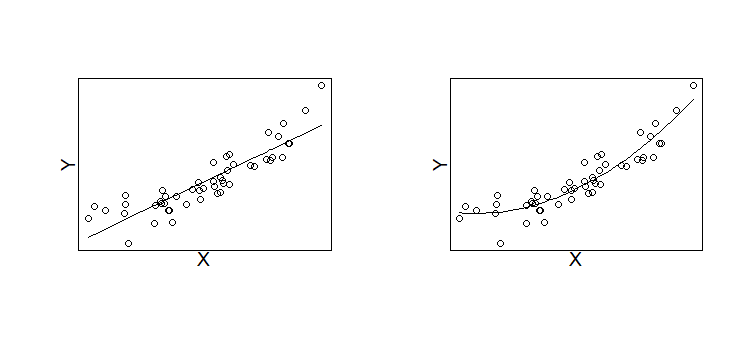

Unfortunately, interpreting $\beta_1$ and $\beta_2$ is not as straightforward as in most linear models. The reason for this is that it is not possible to change $X^2$ by 1 unit whilst holding $X$ constant (although it is possible the other way round). Moreover, quadratic regression models are limited in terms of describing relationships between variables in most medical applications. Quadratic functions either increase to a maximum and the decline, or fall to a minimum and then increase. Further, the behaviour of a quadratic is symmetric about the turning point. Such relationships in medical research are rarely plausible. 

However, the quadratic regression model can be useful as a test for non-linearity. Quadratic terms can be added to a regression model with more than one covariate, and if the results indicate that the quadratic term is an important variable, this is indicative of curvature in the relationship between the outcome and the variable of interest. This often motivates fitting a more realistic model to better describe the non-linear relationship.

*Example*. We will use quadratic regression to assess the linearity assumption for the covariates in Model 3 (recall Model 3 relates birthweight to length of pregnancy and mother's height). 




In [3]:
#Define the squared terms
data$Gestational.Days.squared<-data$Gestational.Days*data$Gestational.Days
data$Maternal.Height.squared<-data$Maternal.Height*data$Maternal.Height

#Quadratic regression to test the linearity between birthweight and gestational days
model_test1<-lm(data$Birth.Weight~data$Gestational.Days+data$Maternal.Height+data$Gestational.Days.squared)
summary(model_test1)

#Quadratic regression to test the linearity between birthweight and mother's height
model_test2<-lm(data$Birth.Weight~data$Gestational.Days+data$Maternal.Height+data$Maternal.Height.squared)
summary(model_test2)


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + data$Maternal.Height + 
    data$Gestational.Days.squared)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.143 -10.666   0.306  10.095  67.692 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.592e+02  5.127e+01  -3.104  0.00195 ** 
data$Gestational.Days          9.689e-01  3.612e-01   2.682  0.00741 ** 
data$Maternal.Height           1.286e+00  1.905e-01   6.748 2.35e-11 ***
data$Gestational.Days.squared -9.487e-04  6.611e-04  -1.435  0.15155    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.43 on 1170 degrees of freedom
Multiple R-squared:  0.1983,	Adjusted R-squared:  0.1962 
F-statistic: 96.45 on 3 and 1170 DF,  p-value: < 2.2e-16



Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + data$Maternal.Height + 
    data$Maternal.Height.squared)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.675 -10.432   0.325  10.002  54.188 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  300.38521  208.00423   1.444   0.1490    
data$Gestational.Days          0.45338    0.03003  15.098   <2e-16 ***
data$Maternal.Height         -10.91959    6.51008  -1.677   0.0937 .  
data$Maternal.Height.squared   0.09539    0.05090   1.874   0.0612 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.42 on 1170 degrees of freedom
Multiple R-squared:  0.1993,	Adjusted R-squared:  0.1972 
F-statistic: 97.05 on 3 and 1170 DF,  p-value: < 2.2e-16


The results indicate that the squared terms for gestational days and mother's height are not important (as indicated by lack of small $p$-values), therefore we can assume that linearity has not been violated. This is consistent with our conclusions based on the normal residual plot. 

In the next section, we briefly discuss some statistical options for modelling non-linear associations more realistically, when the linearity assumption is not met and the quadratic regression model is not appropriate. 


#### 13.4.1.1 More complex modelling of non-linear associations 

The quadratic regression model belongs to a family of **polynomial regression models** and is the simplest model in that family. Further power terms can be added to the regression model in order to increase complexity. For example, a cubic regression model is one which includes a cubic term as well as a squared term. 

An even more flexible approach is to use a **piecewise polynomial model**, which allows for a different polynomial function in different ranges of the observed values of $X$, defined according to specified **knots**. For example, a piecewise cubic polynomial model with two knots at $k_1$ and $k_2$ ($k_1 < k_2$) takes the form:

$$ y_i = 
\begin{cases}
\beta_{01} + \beta_{11}x_i + \beta_{21}x_i^2 + \beta_{31}x_i^3 + \epsilon_i \text{ when } x_i < k_1 \\
\beta_{02} + \beta_{12}x_i + \beta_{22}x_i^2 + \beta_{32}x_i^3 + \epsilon_i \text{ when } k_1 \leq x_i < k_2 \\
\beta_{03} + \beta_{13}x_i + \beta_{23}x_i^2 + \beta_{33}x_i^3 + \epsilon_i \text{ when } k_2 \geq x_i\\
\end{cases}
$$
 
The flexibility of the model (and therefore its ability to model more complex relationships) can be increased by increasing the degree of polynomial and/or the number of knots. However, highly flexible models may overfit the data and make the model difficult to interpret. In general, it is a good idea to consider an appropriate trade-off between flexibility and interpretability. 


### 13.4.2. Modelling interaction terms 

The term **interaction** is used to describe situations in which the relationship between $Y$ and $X$ differs according to the level of one or more other covariates. In linear regression models it is the slope of the relationship between $Y$ and $X$ that depends on other factors.

In this section we introduce the general formulation of a linear model with an interaction term and discuss how to interpret the results. We will consider interactions between pairs of continuous variables, pairs of categorical variables and pairs of variables in which one is categorical and the other is continuous. 

#### 13.4.2.1 The general formulation of a linear regression model with an interaction term between two covariates 

Suppose we wish to relate an outcome ($Y$) to two covariates ($X_1$ and $X_2$), but we want to allow the slope of the association between $Y$ and $X_1$ to differ according to the value of $X_2$. To allow for this we fit an interaction model that contains an additional variable ($X_3$) that is the product of $X_1$ and $X_2$: 

$$y_i =  \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \epsilon_i \text{ where }\epsilon_i \sim NID(0, \sigma^2)$$. 

+ $y_i$ = value of the outcome for the $i^{th}$ observation
+ $x_{1i}$ = value of the first covariate for the $i^{th}$ observation
+ $x_{2i}$ =  value of the second covariate for the $i^{th}$ observation
+ $x_{3i}$ = $x_{1i} \times x_{2i}$

To understand why this model allows the slope of the association between $Y$ and $X_1$ to vary according to $X_2$, we can consider the form of the equation when we fix $X_2$ to have a particular value, say $X_2=k$. In this situation the relationship between $Y$ and $X_1$ is as follows:

$y_i = (\beta_0 + \beta_2k) + (\beta_1 + \beta_3k)x_{1i} + \epsilon_i$. 

In other words, when $x_2=k$ the relationship between $Y$ and $X_1$ is a linear one with both slope and intercept dependent upon $k$. The intercept is $\beta_0+\beta_2k$ and the slope is $\beta_1 +  \beta_3k$. 

By allowing the association between $Y$ and $X_1$ to vary according to $X_2$, we have also allowed the slope for the association between $Y$ and $X_2$ to vary according to $X_1$. If we look at the form of the model when $X_1$ takes particular value, say $X_1=m$, we find:

$y_i = (\beta_0+\beta_1m) + (\beta_2+\beta_3m)x_{2i} + \epsilon_i$. 

Again, the relationship between $Y$ and $X_2$ is a linear one with both slope and intercept dependent upon $m$. 

#### 13.4.2.2 Interaction between a continuous variable and a binary variable

The interaction model is particularly easy to interpret when one of the covariates (say $X_2$) is a binary, taking the values 0 and 1 (i.e. a dummy variable). The linear regression model then becomes:

\begin{align}
&y_i = \beta_0 + \beta_1x_{1i} + \epsilon_i \text{ when } x_2=0\\ 
&y_i = (\beta_0 + \beta_2) + (\beta_1+\beta_3)x_{1i} + \epsilon_i \text{ when } x_2=1 
\end{align}

The interpretation of each of the parameters is as follows. 

+ $\beta_0$ is the intercept when $X_2=0$
+ $\beta_0 + \beta_2$ is the intercept when $X_2=1$ 
+ $\beta_2$ is the difference in intercepts between the two groups defined by $X_2$. 

+ $\beta_1$ is the slope when $X_2=0$
+ $\beta_1+\beta_3$ is the slope when $X_2=1$
+ $\beta_3$ is the difference in slopes between the two groups defined by $X_2$. 

*Example.* To demonstrate the impact of adding an interaction term, we will consider two models: (1) relating birthweight ($Y$) to length of pregnancy ($X_1$) and mother's smoking status ($X_2$) and (2) relating birthweight ($Y$) to length of pregnancy ($X_1$), mother's smoking status ($X_2$) and their interaction ($X_3$). In these models, $X_2=1$ indicates that the mother smokes and $X_2=0$ indicates that the mother does not smoke. 

We first consider the model with no interaction term. The code below defines the model in R, summarises the results and produces a scatter plot of birthweight against gestational days, with the fitted values superimposed. The blue points (and line) on the scatter plot are observations in the group of babies whose mothers do not smoke and the red points (and line) are observations in the group of babies whose mothers do smoke.


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + factor(data$Maternal.Smoker2))

Residuals:
    Min      1Q  Median      3Q     Max 
-50.789 -11.035  -0.211  10.053  52.412 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -3.18492    8.32945  -0.382    0.702    
data$Gestational.Days           0.45117    0.02968  15.200   <2e-16 ***
factor(data$Maternal.Smoker2)1 -8.37440    0.97346  -8.603   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.25 on 1171 degrees of freedom
Multiple R-squared:  0.2157,	Adjusted R-squared:  0.2143 
F-statistic:   161 on 2 and 1171 DF,  p-value: < 2.2e-16


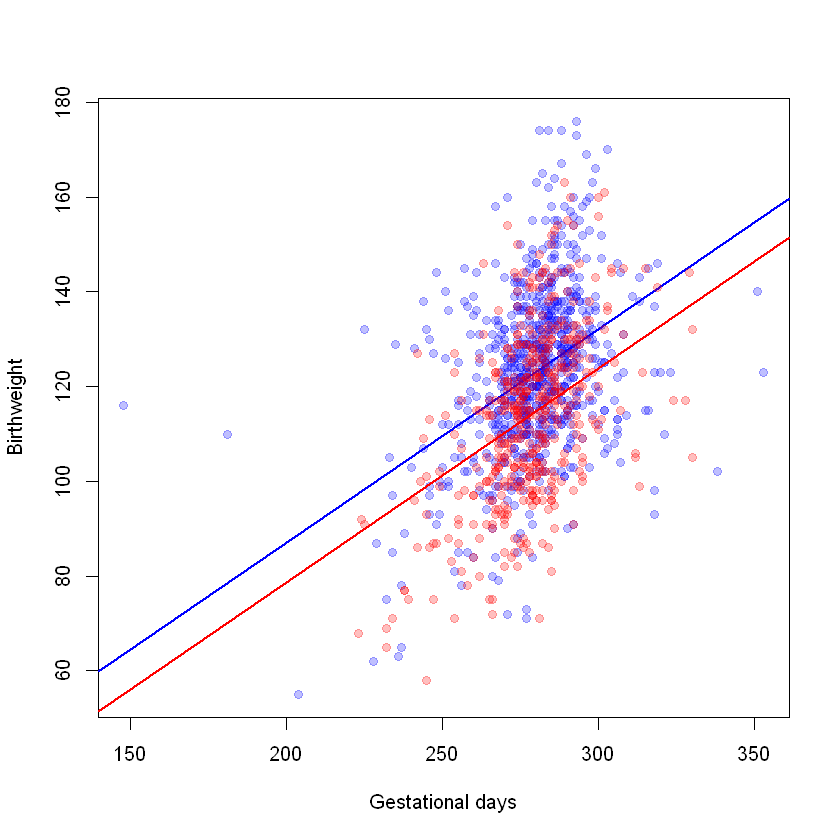

In [4]:
#Define a dummy variable for maternal.smoker
data$Maternal.Smoker2<-0
data$Maternal.Smoker2[data$Maternal.Smoker=="True"]<-1

#Model without the interaction term
no_int_model<-lm(data$Birth.Weight~data$Gestational.Days+factor(data$Maternal.Smoker2))
summary(no_int_model)

#Scatterplot
plot(x = data[data$Maternal.Smoker2 == 0, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 0, ]$Birth.Weight, 
     pch = 19, xlab = "Gestational days", ylab = "Birthweight", col = rgb(red = 0, green = 0, blue = 1, alpha = 0.25))
abline(a = no_int_model$coefficients[1], b = no_int_model$coefficients[2], col = "blue", lwd = 2)
points(x = data[data$Maternal.Smoker2 == 1, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 1, ]$Birth.Weight, 
       col = rgb(red = 1, green = 0, blue = 0, alpha = 0.25), pch = 19)
abline(a = coef(no_int_model)[1] + coef(no_int_model)[3], b = coef(no_int_model)[2], 
       col = "red", lwd = 2)


As can be seen from the above figure, the fitted values from the model with no interaction term form two straight lines with a common slope 0.45 ounces and intercepts -3.18 ounces for the non-smoking group and -3.18-8.37=-11.55 ounces for the smoking group. This type of model (no interactions) is sometimes known as a **parallel lines** regression model, because it restricts the lines to be parallel. It permits adjustment of the effect of one covariate for the effects of others, but forces the effects of a unit change in each covariate to be constant, whatever the level of the other covariate. This restriction is not appropriate if the slope effect of one covariate depends on the value of another covariate. Adding an interaction term removes this restriction. 

Below, we fit the second model which includes an interaction term, and produce a second scatter plot with the fitted values from our new model superimposed. 


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + factor(data$Maternal.Smoker2) + 
    data$int1)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.023 -11.078  -0.084   9.995  50.499 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     19.63964   10.29098   1.908 0.056580 .  
data$Gestational.Days            0.36962    0.03671  10.069  < 2e-16 ***
factor(data$Maternal.Smoker2)1 -72.68713   17.23243  -4.218 2.65e-05 ***
data$int1                        0.23085    0.06176   3.738 0.000194 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.16 on 1170 degrees of freedom
Multiple R-squared:  0.2249,	Adjusted R-squared:  0.2229 
F-statistic: 113.2 on 3 and 1170 DF,  p-value: < 2.2e-16


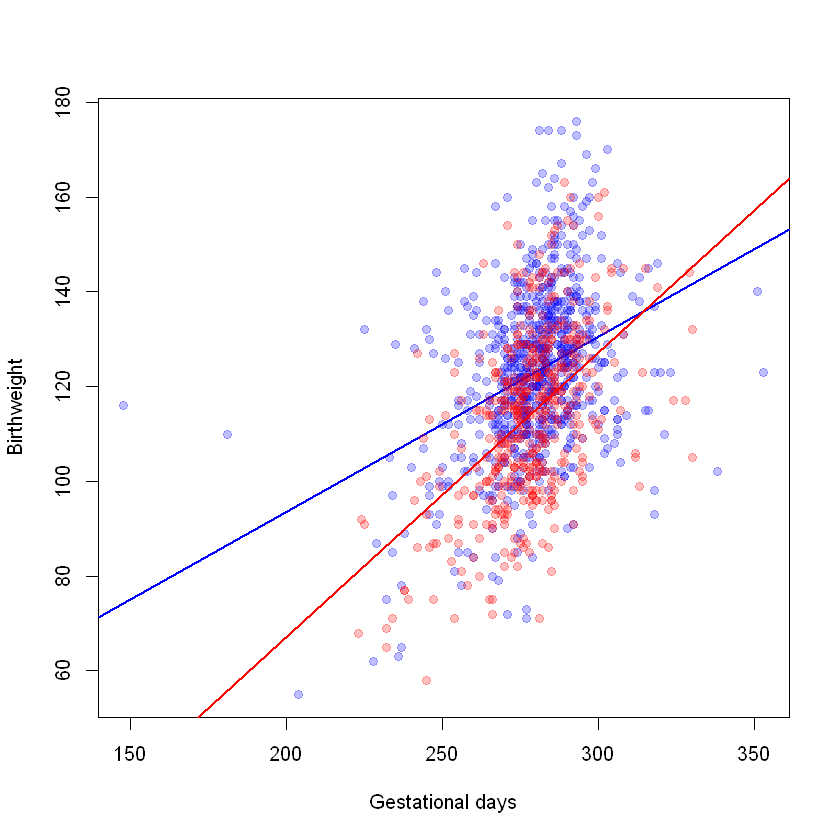

In [5]:
#Create the interaction term
data$int1<-data$Gestational.Days*data$Maternal.Smoker2

#Include the interaction term in our model
int_model1<-lm(data$Birth.Weight~data$Gestational.Days+factor(data$Maternal.Smoker2)+data$int1)
summary(int_model1)

#Scatter plot
plot(x = data[data$Maternal.Smoker2 == 0, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 0, ]$Birth.Weight, 
     pch = 19, xlab = "Gestational days", ylab = "Birthweight", col = rgb(red = 0, green = 0, blue = 1, alpha = 0.25))
abline(a = int_model1$coefficients[1], b = int_model1$coefficients[2], col = "blue", lwd = 2)
points(x = data[data$Maternal.Smoker2 == 1, ]$Gestational.Days, y = data[data$Maternal.Smoker2 == 1, ]$Birth.Weight, 
       col = rgb(red = 1, green = 0, blue = 0, alpha = 0.25), pch = 19)
abline(a = coef(int_model1)[1] + coef(int_model1)[3], b = coef(int_model1)[2] + coef(int_model1)[4], 
       col = "red", lwd = 2)


In our new model, the intercept and slope among the non-smoking group are 19.64 ounces and 0.37 ounces respectively. The intercept and slope among the smoking group are 19.64-72.69=-53.05 ounces and  0.37+0.23=0.60 ounces respectively. The interaction term has $p$=0.0001, so there is evidence that the slopes are different. 

#### 13.4.2.3 Interaction between two binary variables

When both of the covariates are binary, the model can be written as: 

\begin{align}
& y_i =  \beta_0 + \epsilon_i \text{ when } X_1=0 \text{ and } X_2=0 \\
& y_i = \beta_0 + \beta_1 + \epsilon_i \text{ when } X_1=1 \text{ and } X_2=0 \\
& y_i = \beta_0 + \beta_2 + \epsilon_i \text{ when } X_1=0 \text{ and } X_2=1 \\
& y_i = \beta_0 + \beta_1 + \beta_2 + \beta_3 + \epsilon_i \text{ when } X_1=1 \text{ and } X_2=1
\end{align}

If we denote the population mean of $Y$ when $X_1=i$ and $X_2=j$ by $\mu_{ij}$, then the interpretation of each of the parameters is as follows: 

+ $\beta_0$ is the mean value of $Y$ when $X_1=0$ and $X_2=0$ ($\mu_{00}$)
+ $\beta_0+\beta_1$ is the mean value of $Y$ when $X_1=1$ and $X_2=0$. Hence $\beta_1$ is the difference in the mean values of $Y$ between the two groups defined by $X_1$ when $X_2=0$ ($\mu_{10}-\mu_{00}$). 
+ $\beta_0 + \beta_2$ is the mean value of $Y$ when $X_1=0$ and $X_2=1$. Hence $\beta_2$ is the difference in the mean values of $Y$ between the two groups defined by $X_2$ when $X_1=0$ ($\mu_{01}-\mu_{00}$). 
+ $\beta_0$+$\beta_1$+$\beta_2$+$\beta_3$ is the mean value of $Y$ when $X_1=1$ and $X_2=1$. Hence $\beta_3$ is the difference in the mean values of $Y$ between the two groups defined by $X_2$ when $X_1=1$ minus the difference in the mean values of $Y$ between two groups defined by $X_2$ when $X_1=0$ $[(\mu_{11}-\mu_{10})-(\mu_{01}-\mu_{00})]$. 

Interpretation of $\beta_3$ is symmetric in $X_1$ and $X_2$: it is also interpretable as the difference in the mean values of $Y$ between the two groups defined by $X_1$ when $X_2=1$ minus the same difference when $X_2=0$ $[(\mu_{11}-\mu_{01})-(\mu_{10}-\mu_{00})]$.

*Example.* As there is only one binary variable in the birthweight data (mother's smoking status), we will create an additional binary variable by categorising the mother's height (now denoted as $X_2$) into two groups:

$$ X_2 = 
\begin{cases}
0 \text{ when the mother's height is 64 inches or less} \\
1 \text{ when the mother's height is greater than 64 inches} 
\end{cases}
$$

This is not something that we recommend in practice! We are categorising the variable here purely to demonstrate the inclusion of binary-binary interactions in linear regression models. 

The R code below fits a linear regression model relating birthweight ($Y$) to mother's smoking status ($X_1$) and mother's height group ($X_2$). 
 



In [6]:
#Create a binary variable indicating height group
data$Maternal.Height2<-0
data$Maternal.Height2[data$Maternal.Height>64]<-1

#Create the interaction term 
data$int2<-data$Maternal.Smoker2*data$Maternal.Height2

#Model relating birthweight to mothers smoking status, height and their interaction
int_model2<-lm(data$Birth.Weight~factor(data$Maternal.Smoker2)+factor(data$Maternal.Height2)+factor(data$int2))
summary(int_model2)


Call:
lm(formula = data$Birth.Weight ~ factor(data$Maternal.Smoker2) + 
    factor(data$Maternal.Height2) + factor(data$int2))

Residuals:
    Min      1Q  Median      3Q     Max 
-71.662 -10.424  -0.424  11.338  53.576 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    120.4244     0.8639 139.394  < 2e-16 ***
factor(data$Maternal.Smoker2)1  -9.7187     1.4072  -6.906 8.14e-12 ***
factor(data$Maternal.Height2)1   6.2379     1.3227   4.716 2.70e-06 ***
factor(data$int2)1               0.5351     2.1056   0.254    0.799    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.49 on 1170 degrees of freedom
Multiple R-squared:  0.09145,	Adjusted R-squared:  0.08912 
F-statistic: 39.26 on 3 and 1170 DF,  p-value: < 2.2e-16


*Exercise:* Interpret each of the estimated regression coefficients in this model. What are the mean birthweights of babies in the four groups defined by mother's smoking status and height group? 

#### 13.4.2.4 Interaction between two continuous predictor variables

We have seen that when $X_1$ is continuous and $X_2$ is binary, the interaction term is interpretable as the difference in slopes ($Y$ on $X_1$) between two groups defined by the binary variable $X_2$. When both $X_1$ and $X_2$ are continuous, the interaction term is interpretable as the difference in slopes ($Y$ on $X_1$) per unit increase in $X_2$.

*Example:* To illustrate continuous-continuous interactions, we will fit a model relating birthweight ($Y$) to length of pregnancy ($X_1$), mother's height ($X_2$; $X_2$ is now treated as a continuous variable) and the interaction between length of pregnancy and mother's height ($X_3$).


In [7]:
#Create the interaction term 
data$int3<-data$Gestational.Days*data$Maternal.Height

#Include the interaction term in the regression model 
int_model3<-lm(data$Birth.Weight~data$Gestational.Days+data$Maternal.Height+data$int3)
summary(int_model3)


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + data$Maternal.Height + 
    data$int3)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.794 -10.572   0.204  10.265  54.515 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)           -27.200984 222.960540  -0.122    0.903
data$Gestational.Days   0.232172   0.799566   0.290    0.772
data$Maternal.Height    0.320110   3.473652   0.092    0.927
data$int3               0.003432   0.012453   0.276    0.783

Residual standard error: 16.45 on 1170 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1949 
F-statistic: 95.63 on 3 and 1170 DF,  p-value: < 2.2e-16


To interpret the above output, let's first focus on the relationship between birthweight and height in babies born at 200 gestational days. 

\begin{align}
E(Y|X_1=200)&=-27.201+0.232 \times 200+0.320 \times X_2+0.003 \times 200 \times X_2\\
 &= 19.200 + 0.920X_2
\end{align}

Amongst babies born at 201 days the analogous relationship is:

\begin{align}
E(Y|X_1=201)&=-27.201+0.232 \times 201+0.320 \times X_2+0.003 \times 201 \times X_2\\
 &=  19.431 + 0.923X_2
\end{align}

Amongst babies born at 202 days the analogous relationship is:

\begin{align}
E(Y|X_1=202)&=-27.201+0.232 \times 202+0.320 \times X_2+0.003 \times 202 \times X_2\\
 &=  19.662 + 0.926X_2
\end{align}

The interpretation is that at each number of gestational days, the relationship between height and birthweight is linear with the slope of association increasing by 0.003 ounces ($\hat{\beta_3}$) for each one day increase. However, in this example the $p$-value associated with the estimated regression coefficient for the interaction term is 0.783, indicating that the data do not provide evidence of an interaction between gestational days and mother's height on birthweight. 

### 13.4.3 Collinearity 

A potential issue that can arise from including higher-order terms or interaction terms in a linear regression model is collinearity. Collinearity occurs when there is correlation between one or more of the independent covariates. If the degree of correlation between covariates is high enough, it can cause the following problems: 

1. Estimated coefficients can swing in either direction: known important variables may have surprisingly small coefficient estimates and known less important variables may have surprisingly large coefficient estimates.

2. Increased variance of estimated coefficients, therefore reducing the statistical power of the model. 

Including higher-order terms or interaction terms can result in collinearity due to the inevitable correlation between variables, their powers and the interaction terms involving them. Having said that, collinearity is only a concern in particular situations. 

Collinearity only affects the specific independent variables that are correlated. Therefore, if the aim of the analysis is to estimate the way $X$ influences $Y$ after adjusting for $W$ and $V$, and there is only correlation between $W$ and $V$, then collinearity is not a concern. Moreover, collinearity rarely affects the predicted outcomes, so if the aim of the analysis is to predict $Y$ using data from $X$, $W$ and $V$, then collinearity between any of the covariates is not a concern. Finally, the severity of the problems caused by collinearity increases with the degree of correlation. Therefore, if only moderate or weak correlation is present, then collinearity is not a concern. 

If we are in a situation where collinearity is causing problems, then we could either remove some of the highly correlated variables, or transform one of them. Examples of transformations include:

1. Instead of using systolic and diastolic blood pressure as collinear predictor variables, use diastolic blood pressure and (systolic-diastolic blood pressure). 
2. Instead of using height and weight as predictor variables, use height and body mass index (weight/height$^2$). 
3. When fitting a quadratic regression model, use $X$ and $(X-\bar{X})^2$, rather than $X$ and $X^2$ as covariates. 

## 13.5 Different types of investigation 

We have now learnt how to fit linear models, interpret the results, test the assumptions and model more complex associations. We now consider the different types of research question that linear regression models can be used for. We will see how the type of research question being asked can influence the role of the covariates and the interpretation and presentation of the results. 


### 13.5.1 Different types of investigation

The three different types of investigation we focus on here are:

1. Analysis of risk factors
2. Prediction analysis
3. Causal inference 

These types of investigation were introduced in Lesson 11 and we provide a brief reminder here. 

A **risk factor** for a particular outcome is a variable that is associated with that outcome. In a risk factor analysis the aim is to investigate how one or more potential risk factors are associated with an outcome. For example, we may want investigate how age, sex, comorbidities etc. are associated with the risk of contracting coronavirus disease. 

Prediction analysis uses variables in our data to predict a future observation of a particular outcome. The model in a prediction analysis may be referred to as a **prediction model**, a **risk prediction model** or a **prognosis model**. A well known example of a predition model is the [QRISK](https://qrisk.org/three/) score which predicts a person's risk of developing a heart attack or stroke over the next 10 years using a range of characteristics such as age, sex, smoking status etc. 

Causal inference focuses on estimating the effect of a particular **exposure** or **treatment** of interest on an outcome.  For example, we may be interested in the **casual effect** of insulin use (treatment) on lung function (outcome) in patients with cystic fibrosis. 

*Exercise*. Recall the three examples given for types questions that we can investigate using statistical models (at the beginning of the previous chapter): 

   + Does birthweight increase with length of pregnancy?
   + Does taking drug A reduce inflammation more than taking drug B in patients with arthritis?
   + Can we predict the risk of heart disease for our patients? 
   
What type of research question do you classify the above examples as? 

In the following subsections we will consider how the different types of investigation influence how we perform and interpret linear regression analyses in more detail. In each case we will assume that we are interested in one outcome $Y$ and three covariates $X_1$, $X_2$ and $X_3$.  

### 13.5.2 Analysis of risk factors

Analyses of risk factors are concerned with estimating conditional and/or unconditional associations between the covariates ($X_1$, $X_2$ and $X_3$) and the outcome ($Y$). Typical analyses may start with univariable regression models (e.g. three simple linear regression models relating $Y$ to each covariate individually) and then proceed to a multivariable analysis. In such analyses we would report the estimated regression coefficients and associated confidence intervals.

In such analyses it is important to remember that association does not imply causation. Results from risk factor analyses are often mistakenly interpreted as causal. However, this type of analysis does not consider temporal ordering, or appropriately account for confounding (a concept described in more detail in a subsequent section) and so interpreting the regression coefficients in a risk factor analysis as causal effects can be misleading. 

The results from a risk factor analysis may reveal some associations that are potentially causal and it might be of interest to follow up with a formal causal inference.

### 13.5.3 Prediction 

In a prediction analysis, we would use $X_1$, $X_2$ and $X_3$ to predict $Y$ and the $X$-variables are often termed **predictors**. In this type of analysis, we are less concerned with how the covariate relates to each other and their temporal ordering. We simply want to achieve a good prediction of $Y$. The statistics of interest are the fitted values (often termed **predictions** or **predicted values**), rather than the estimated regression coefficients. When reporting the results of a prediction analysis we would report which variables were included in the prediction model and how they were modelled, along with diagnostics that measure the predictive performance of the model (e.g. the coefficient of determination and the mean square error).  


### 13.5.4 Causal inference

Suppose we are interested in estimating the effect of $X_1$ on $Y$. The focus of the analysis is on estimating the regression coefficient of $X_1$ ($\beta_1$) and the results should report this estimate along with a confidence interval. However, in order to obtain an estimate of $\beta_1$ that we can interpret causally, we need to control (or adjust) for the **confounding effects** of the other covariates. This can be a difficult task and for this reasons causal inference is often thought to be the most challenging type of investigation. 

Confounding occurs when there are covariates that obscure the true causal association between the exposure of interest and the outcome. This will happen when the exposure and the outcome share common causes. 

*Example 1:* Suppose we are interested in the effect of air pollution on lung function. Here, air pollution is the exposure ($X$) and lung function is the outcome ($Y$). In our analysis we compare the average lung functions of people living in an area with low air pollution (the **unexposed** or **control** group) to people in an area with high air pollution (the **exposed** group), using a simple linear regression relating $Y$ to $X$ ($X=1$ for people in the exposed group and $X=0$ for people in the unexposed group). We find that the average lung function is much worse in the exposed group, compared to the unexposed and so conclude that air pollution has a strong negative effect on lung function. However, suppose that the people in the unexposed group exercise more, on average, than the exposed group (poor air quality discourages people from spending time outside and therefore the exposed group exercise less). Since exercise is a predictor of lung function, the average lung function in the unexposed group would be higher, on average, than the lung function in the exposed group. Consequently, a simple comparison of average lung functions between the two groups, not accounting for exercise, would make the effect of air pollution seem larger than it actually is. In this case, exercise **confounds** the association between air pollution and lung function. To obtain an unbiased estimate of the causal effect of air pollution on lung function, we would need to adjust for exercise. 

*Example 2:* Suppose we are interested in the effect of taking vitamin supplements on risk of cardiovascular disease. We compare the rates of cardiovascular disease in people who take vitamins compared to those who don't, and find that the group who do take vitamins are less likely to develop cardiovascular disease. We may conclude that taking vitamins lowers risk of cardiovascular disease. However, the people who do take vitamins are also more likely to exercise more, eat more healthily, drink less alcohol and not smoke, compared to those who do not take vitamins. It turns out, that their lifestyle choices are the real causes of the lower risk of cardiovascular disease, not the use of vitamins. 

*Exercise: identify the exposure, outcome and confounders in Example 2.*

### 13.5.6 Example using the birthweight data

As an example of the ideas discussed above, we will return to the multivariable linear regression model we have previous defined, relating birthweight to length of pregnancy and mother's height. We will consider how this model can be presented and interpreted differently, depending on the aims of the analysis. 

Recall the model is defined as:

$$\text{Model 3: } y_i = \beta_0 + \beta_1 l_i + \beta_2h_i +  \epsilon_i $$

A DAG depicting the assumed relationships between the variables in the model, and R output summarising the results of the model are given below. 

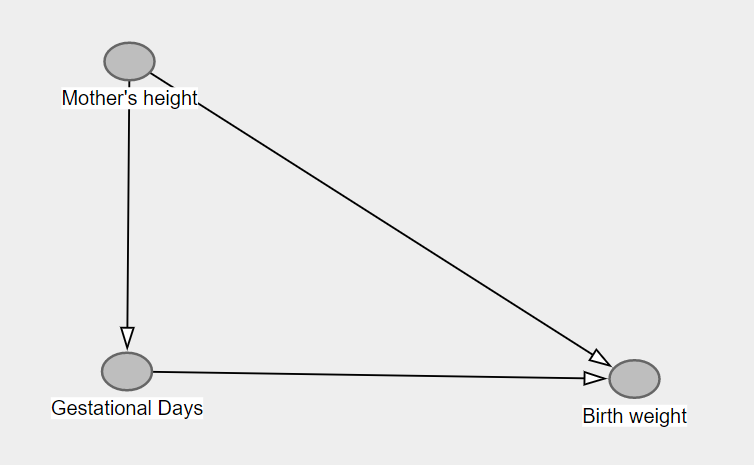

In [8]:
summary(model3)
confint(model3, parm=c(2,3), level=0.95)


Call:
lm(formula = Birth.Weight ~ Gestational.Days + Maternal.Height, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.829 -10.589   0.246  10.254  54.403 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -88.51993   14.31910  -6.182 8.73e-10 ***
Gestational.Days   0.45237    0.03006  15.051  < 2e-16 ***
Maternal.Height    1.27598    0.19049   6.698 3.27e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.44 on 1171 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1955 
F-statistic: 143.5 on 2 and 1171 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
Gestational.Days,0.3934004,0.5113389
Maternal.Height,0.9022310,1.6497197


#### 13.5.6.1 Analysis of risk factors

Suppose our aim was to explore length of pregnancy and mother's height as potential "risk factors" of birthweight. Then we would interpret these results as follows: 

After adjusting for mother's height, a daily increase in length of pregnancy was associated with an increase of 0.45 (0.39-0.51) ounces in mean birthweight. After adjusting for length of pregnancy, an increase of one inch the mother's height was associated with an increase of 1.28 (0.90-1.65) ounces in mean birthweight. 

Since 0 is not included in the 95\% confidence intervals for height or length of pregnancy, we can conclude that there is evidence of conditional associations between mother's height and birthweight, and length of pregnancy and birthweight. 

#### 13.5.6.2 Prediction analysis

Now suppose our aim was to predict the birthweight of future babies, using information on their mother's height and the length of pregnancy. We are now less interested in the estimated regression coefficients and more interested in the predicted values. For example, suppose we wanted to predict the birthweight of a baby whose mother was 66 inches and whose pregnancy lasted 200 days. We would obtain the relevant predicted value and its 95\% confidence interval: 

In [9]:
new.data<-data.frame(Gestational.Days=200,Maternal.Height=66)
predict(model3, newdata=new.data, interval="confidence", level=0.95)

fit,lwr,upr
86.16838,81.30474,91.03201


Or, we may wish to obtain the relevant prediction interval:

In [10]:
predict(model3, newdata=new.data, interval="prediction", level=0.95)

fit,lwr,upr
86.16838,53.54902,118.7877


Based on the above results, we would predict that a baby whose mother was 66 inches tall and whose pregancy lasted 200 days would weigh somewhere between 81.30 and 91.03 ounces. Additionally, we estimate that 95\% of babies whose mother was 66 inches tall and whose pregancy lasted 200 days would weigh between 53.55 and 118.79 ounces. 

It's important to also present statistics indicating the predictative performance of the model. In this case, $R^2=0.1969$, indicating that the model can only account for 19.7\% of the total variation in the outcome. 

#### 13.5.6.3 Causal inference

Finally, suppose our aim was to estimate the causal effect of length of pregnancy on birthweight. As is shown in the DAG, we assumed that mother's height was a common cause of length of pregnancy and birthweight and therefore needed to adjust for it in the analysis to remove confounding bias. 

From the output above, we would report $\hat{\beta_1}=0.45$ and the 95\% confidence interval: (0.39, 0.51). Based on these results, we can conclude that length of pregnancy does have a causal effect on birthweight (since 0 does not lie within the confidence interval). However, the validity of these findings rely on the assumption that there are **no unmeasured variables causing confounding bias** (which is a very strong assumption and can be difficult to justify).

It is important to understand that we cannot interpret $\hat{\beta_2}$ in the same way as $\hat{\beta_1}$ in this analysis. We interpreted $\beta_1$ causally, because mother's height was the only confounding variable in the association between length of pregnancy and birthweight, and we controlled for it in the analysis. However, length of pregnancy is not a confounding variable for the association between mother's height and birthweight. In fact, length of pregnancy lies on the causal pathway between mother's height and birthweight, which means that some of the effect of mother's height on birthweight can be explained through the length of pregnancy. According to our DAG, the **total effect** of mother's height on birthweight comprises of two parts: (1) the **direct effect** (denoted by the path between height and birthweight) and (2) the **indirect effect** (denoted by the causal pathway that runs through length of pregnancy). Since we have adjusted for length of pregnancy in our analysis, we have controlled for the indirect effect of mother's height on birthweight and therefore $\hat{\beta}_2$ represents the direct effect only. 

It is a common mistake in medical research to interpret all the estimated regression coefficients from a multivariable model in the same way, but as our example has shown, this can be misleading. This problem is known in the literature as the **Table 2 fallacy**. 


## 13.6 Summary of chapter

In the current chapter, we have learnt the following: 

 + How to use graphical tools to investigate the assumptions of a linear regression model 
 + Possible solutions to violations of the assumptions exist, including:
     + Checking the data
     + Transformations
     + Sensitivity analyses
 + How to use quadratic regression to model non-linear associations and test for linearity
 + Methods for modelling more complex non-linear relationship exist, including:
     + Polynomial regression 
     + Piecewise polynomial regression
 + How to include interaction terms in a linear regression model and how to interpret their regression coefficients
 + When collinearity might be an issue and potential solutions
 + Regression models can be used to investigate different types of research questions, and the interpretation and presentation of the results depends on the type of question being investigated. 
 
All of our discussion on regression models so far has focussed on a continuous outcome. In the next chapter, we consider regression models that can be used when the outcome is binary. 